In [3]:
using Revise
using Pkg; Pkg.activate(".")

using Dates
using Statistics
using Interpolations
using DSP
using FFTW
using NCDatasets
using JLD2
using Printf

include("./read_lidar.jl")
using .read_lidar
# using MAT

using PyPlot

  Activating project at `~/Projects/ASTRAL/lidar`


In [4]:
m2n(x) = ismissing(x) ? NaN : x
pd = permutedims

"lidar beam range"
rng(iz, rangegate=24.0) = rangegate * (iz-1 + 0.5)

rng

In [10]:
epsdir = "./epsilon_data"
files = filter(f -> startswith(f, "epsilon_2024") & endswith(f, ".jld2") , readdir(epsdir))

nf = length(files)
epsi = Vector{Matrix{Union{Missing, Float64}}}(undef, nf)
c = 0
for f in files
    c += 1
    epsi[c] = load(joinpath(epsdir, f))["epsilon"]
end

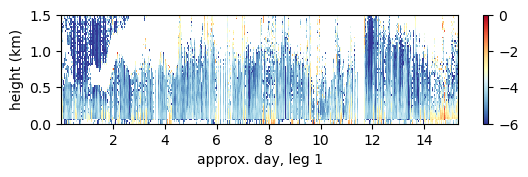

In [38]:
# map(x -> cat(x, dims=1), epsi)
flt(ep) = m2n(ep) >= 0 ? ep : NaN
nt = size(vcat(epsi...), 1)

clf()
subplot(3,1,1)
pcolormesh((1:nt)/115, rng.(1:80)/1e3, log10.(pd(flt.(vcat(epsi...)))), cmap=ColorMap("RdYlBu_r"), vmin=-6, vmax=0)
colorbar()
ylim([0, 1.5])
ylabel("height (km)")
xlabel("approx. day, leg 1")
gcf()

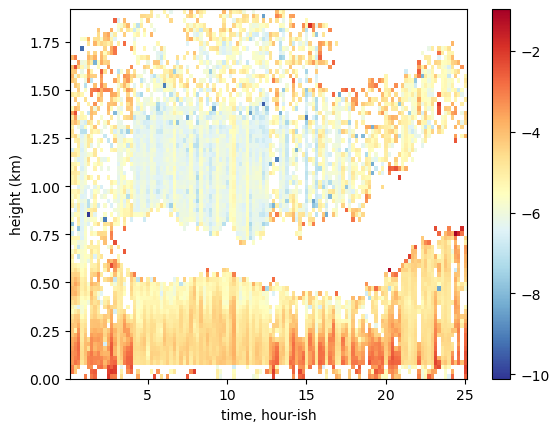

PyObject Text(24.000000000000007, 0.5, 'height (km)')

In [37]:
f = files[2]
epsi = load(joinpath(epsdir, f))["epsilon"]

clf()
pcolormesh((1:size(epsi,1))*24/115, rng.(1:80)/1e3, log10.(pd(m2n.(epsi))), cmap=ColorMap("RdYlBu_r"))
colorbar()
xlabel("time, hour-ish")
ylabel("height (km)")

LoadError: KeyError: key :epsilon not found